In [186]:
#for data extraction ,maniplution and analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train-test split
from sklearn.model_selection import train_test_split

# Linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#decision tree
from sklearn.tree import DecisionTreeRegressor

# regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# to ignore wornings
import warnings
warnings.simplefilter('ignore')

In [187]:
# import data and convert it into Pandas Dataframe
df=pd.read_csv("gym_members_exercise_tracking_synthetic_data.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [188]:
# check for no. of rows and no. of columns
df.shape

(1800, 15)

In [189]:
# check for size
df.size

27000

In [190]:
# check for information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [191]:
# check for statistics 
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [192]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                           object
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

In [193]:
# check count of null value
df.isna().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

In [194]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [195]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [196]:
df["Weight (kg)"]=df["Weight (kg)"].fillna(df["Weight (kg)"].median())

In [197]:
df["Height (m)"]=df["Height (m)"].fillna(df["Height (m)"].mean())

In [198]:
df["Max_BPM"]=df["Max_BPM"].fillna(df["Max_BPM"].mode()[0])

In [199]:
df["Avg_BPM"]=df["Avg_BPM"].fillna(df["Avg_BPM"].mean())

In [200]:
df["Resting_BPM"]=df["Resting_BPM"].fillna(df["Resting_BPM"].mean())

In [201]:
df["Session_Duration (hours)"]=df["Session_Duration (hours)"].fillna(df["Session_Duration (hours)"].mean())

In [202]:
df = df.dropna(subset=['Calories_Burned'])

In [203]:
df["Workout_Type"]=df["Workout_Type"].fillna(df["Workout_Type"].mode()[0])

In [204]:
df["Fat_Percentage"]=df["Fat_Percentage"].fillna(df["Fat_Percentage"].mean())

In [205]:
df["Water_Intake (liters)"]=df["Water_Intake (liters)"].fillna(df["Water_Intake (liters)"].mean())

In [206]:
df["Workout_Frequency (days/week)"]=df["Workout_Frequency (days/week)"].fillna(df["Workout_Frequency (days/week)"].mean())

In [207]:
df["Experience_Level"]=df["Experience_Level"].fillna(df["Experience_Level"].mean())

In [208]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [209]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## univariate analysis of columns

### Statistical analysis of numerical columns

In [212]:
# create a function for calculating statistical analysis of numerical column
from scipy.stats import skew, mode
def cal_stats(data, column_name):
    column = data[column_name]
    # Calculating statistics
    stats = {
        'Mean': column.mean(),
        'Median': column.median(),
        'Mode': mode(column)[0],
        'Min': column.min(),
        'Max': column.max(),
        'Range': column.max() - column.min(),
        'Variance': column.var(),
        'Standard Deviation': column.std(),
        'Skewness': skew(column),
    } 
    df1=pd.DataFrame.from_dict(stats,orient='index',columns=['Statistics'])
    return df1

In [213]:
#1] Age
cal_stats(df,"Age")

,Statistics
Mean,34.393221
Median,33.000000
Mode,18.000000
Min,18.000000
Max,59.000000
Range,41.000000
Variance,150.275617
Standard Deviation,12.258696
Skewness,0.285964


In [214]:
#2] Weight (kg)
cal_stats(df,"Weight (kg)")

,Statistics
Mean,67.590152
Median,65.300000
Mode,40.000000
Min,40.000000
Max,129.900000
Range,89.900000
Variance,388.206969
Standard Deviation,19.702969
Skewness,0.649899


In [215]:
#3] Height (m)
cal_stats(df,"Height (m)")

,Statistics
Mean,1.739449
Median,1.739233
Mode,2.000000
Min,1.500000
Max,2.000000
Range,0.500000
Variance,0.015085
Standard Deviation,0.122820
Skewness,0.170159


In [216]:
#4] Avg_BPM
cal_stats(df,"Avg_BPM")

,Statistics
Mean,146.208655
Median,146.000000
Mode,169.000000
Min,120.000000
Max,169.000000
Range,49.000000
Variance,227.940120
Standard Deviation,15.097686
Skewness,-0.019978


In [217]:
#5] Resting_BPM
cal_stats(df,"Resting_BPM")

,Statistics
Mean,63.919005
Median,65.000000
Mode,74.000000
Min,50.000000
Max,74.000000
Range,24.000000
Variance,62.329610
Standard Deviation,7.894910
Skewness,-0.199048


In [218]:
#6] Session_Duration (hours)
cal_stats(df,"Session_Duration (hours)")

,Statistics
Mean,1.391501
Median,1.370000
Mode,2.000000
Min,0.500000
Max,2.000000
Range,1.500000
Variance,0.137169
Standard Deviation,0.370363
Skewness,0.068855


In [219]:
#7] Calories_Burned
cal_stats(df,"Calories_Burned")

,Statistics
Mean,1033.698931
Median,1030.000000
Mode,1783.000000
Min,303.000000
Max,1783.000000
Range,1480.000000
Variance,107616.581041
Standard Deviation,328.049662
Skewness,0.185055


In [220]:
#8] Fat_Percentage
cal_stats(df,"Fat_Percentage")

,Statistics
Mean,23.513905
Median,24.200000
Mode,10.000000
Min,10.000000
Max,35.000000
Range,25.000000
Variance,34.256267
Standard Deviation,5.852885
Skewness,-0.542317


In [221]:
#9] Water_Intake (liters)
cal_stats(df,"Water_Intake (liters)")

,Statistics
Mean,2.706556
Median,2.706556
Mode,1.500000
Min,1.500000
Max,3.700000
Range,2.200000
Variance,0.497260
Standard Deviation,0.705167
Skewness,-0.334867


In [222]:
#12] BMI
cal_stats(df,"BMI")

,Statistics
Mean,19.950063
Median,18.760000
Mode,12.320000
Min,12.320000
Max,49.840000
Range,37.520000
Variance,42.743852
Standard Deviation,6.537878
Skewness,1.116656


### visualization of numerical data by histogram

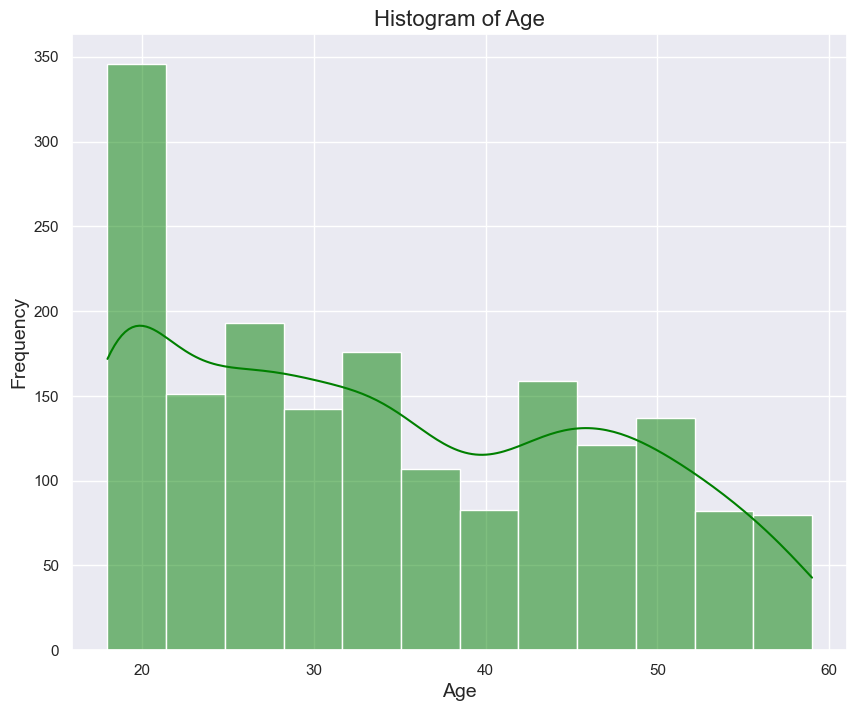

In [224]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Age"], kde = True, color = "Green")
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

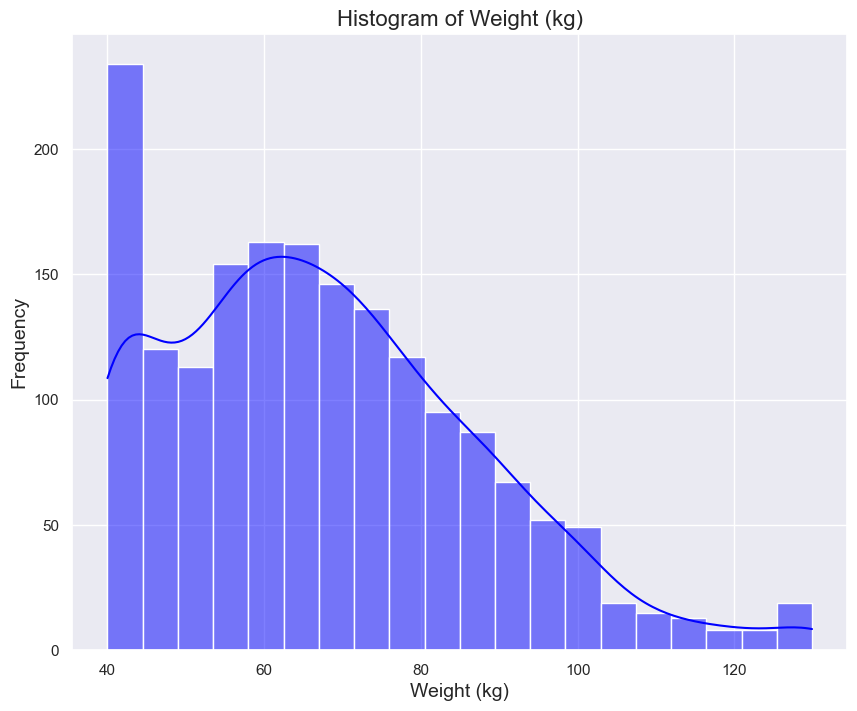

In [225]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Weight (kg)"], kde = True, color = "Blue")
plt.title('Histogram of Weight (kg)', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

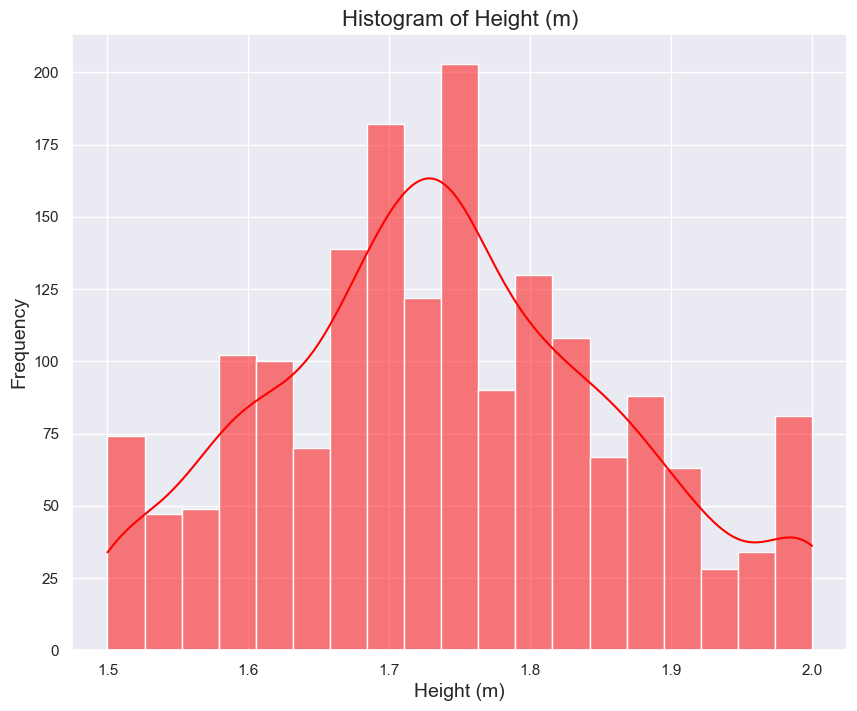

In [226]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Height (m)"], kde = True, color = "Red")
plt.title('Histogram of Height (m)', fontsize=16)
plt.xlabel('Height (m)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

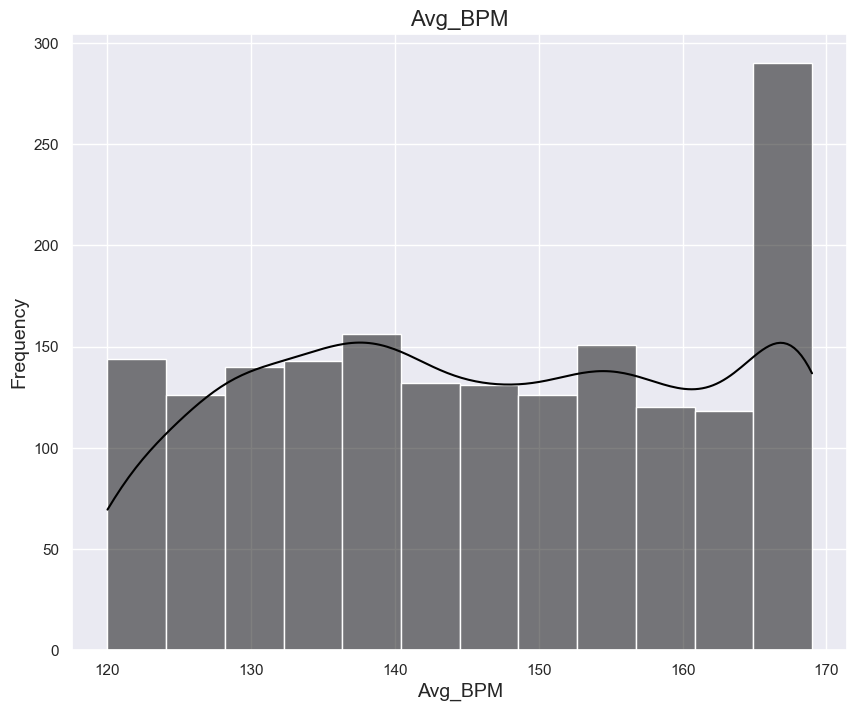

In [227]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Avg_BPM"], kde = True, color = "Black")
plt.title('Avg_BPM', fontsize=16)
plt.xlabel('Avg_BPM', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

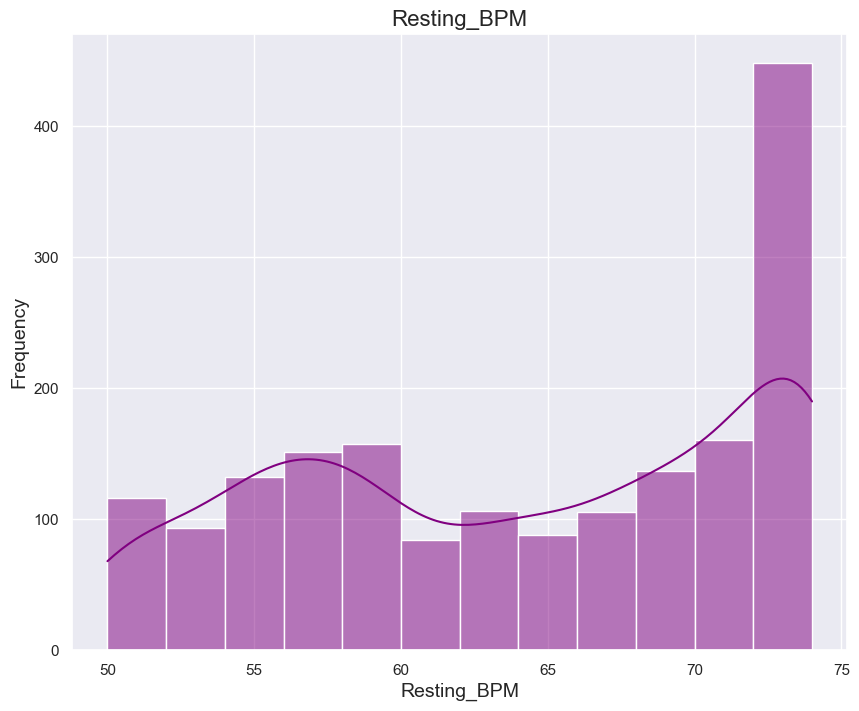

In [228]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Resting_BPM"], kde = True, color = "Purple")
plt.title('Resting_BPM', fontsize=16)
plt.xlabel('Resting_BPM', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

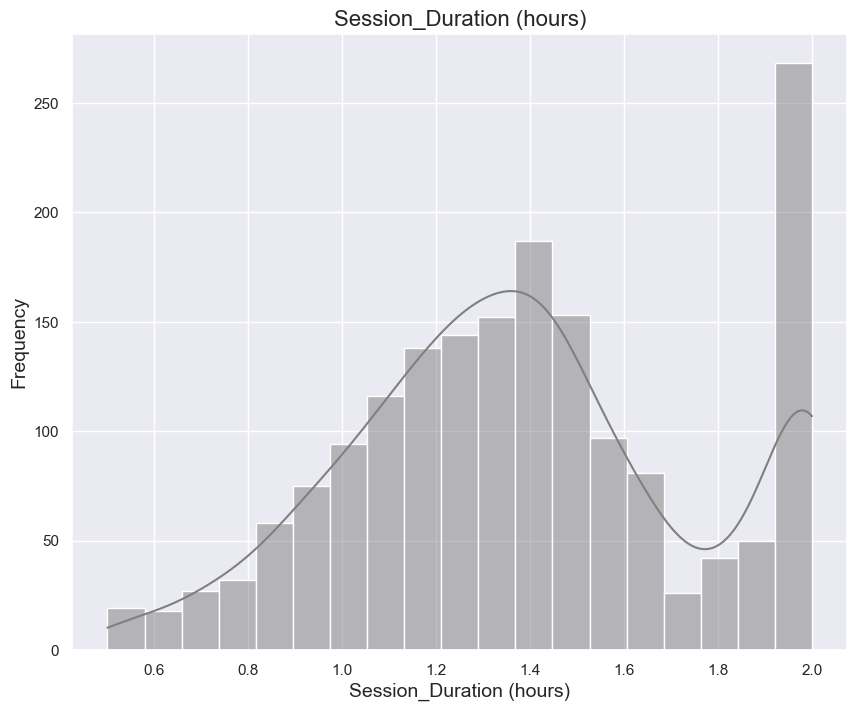

In [229]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Session_Duration (hours)"], kde = True, color = "Grey")
plt.title('Session_Duration (hours)', fontsize=16)
plt.xlabel('Session_Duration (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

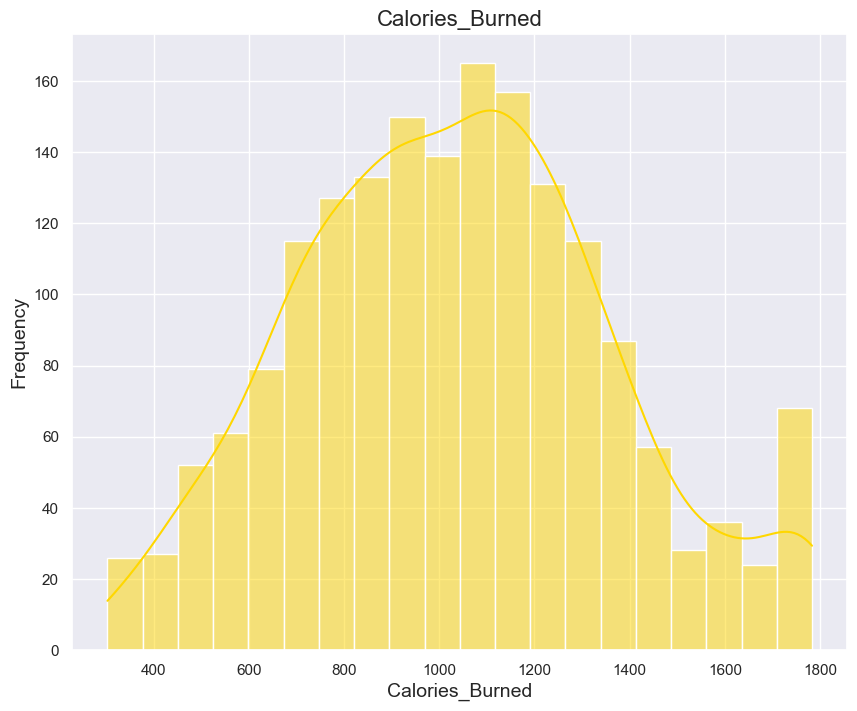

In [230]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Calories_Burned"], kde = True, color = "Gold")
plt.title('Calories_Burned', fontsize=16)
plt.xlabel('Calories_Burned', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

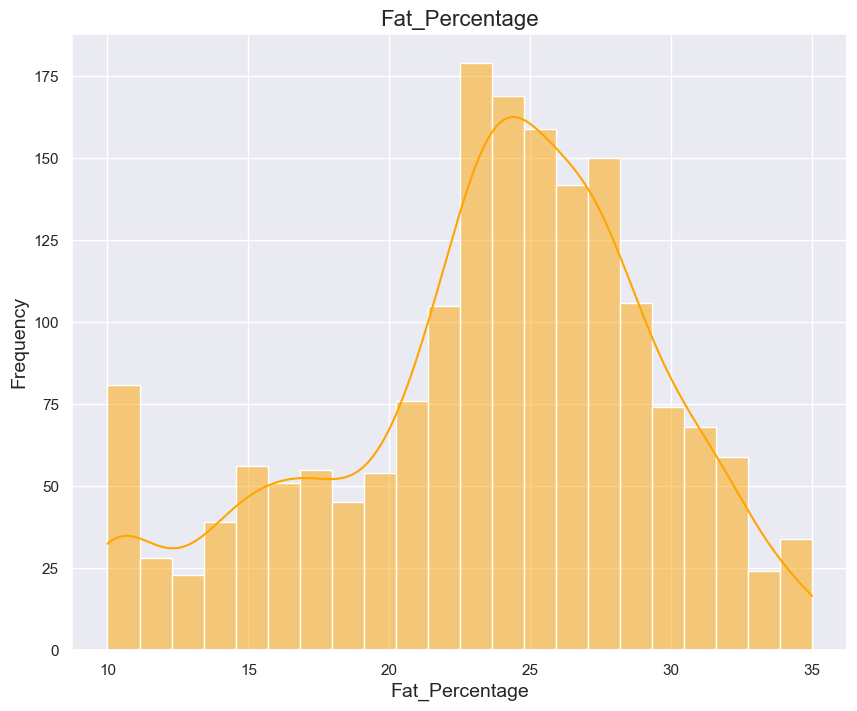

In [231]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Fat_Percentage"], kde = True, color = "Orange")
plt.title('Fat_Percentage', fontsize=16)
plt.xlabel('Fat_Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

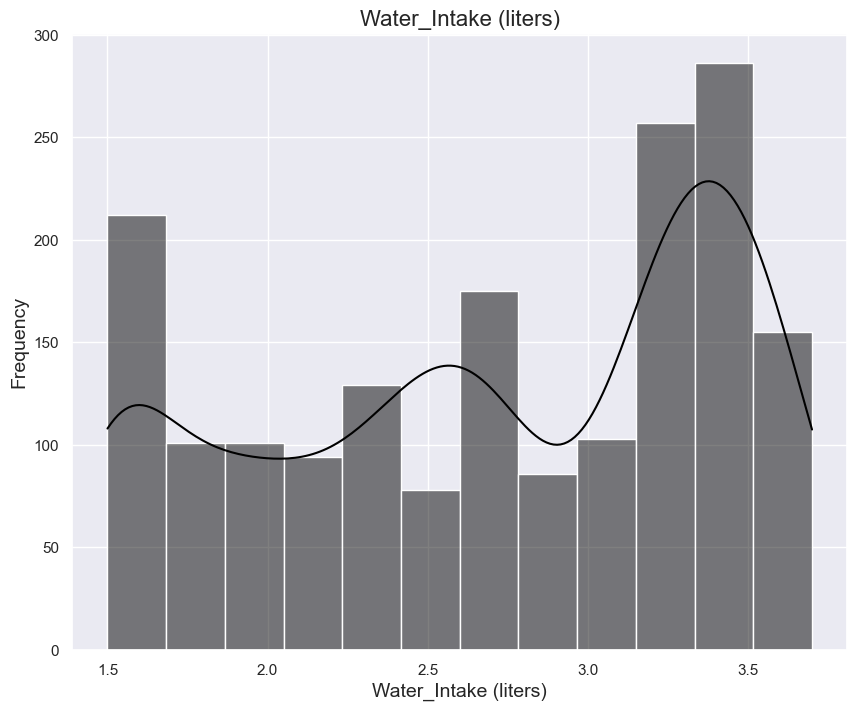

In [232]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Water_Intake (liters)"], kde = True, color = "Black")
plt.title('Water_Intake (liters)', fontsize=16)
plt.xlabel('Water_Intake (liters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

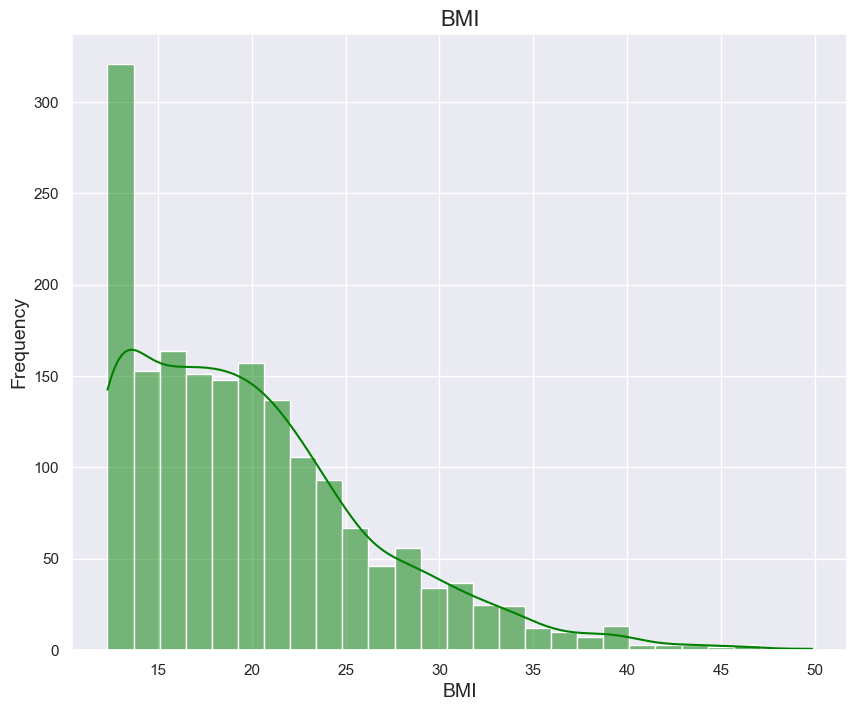

In [233]:
plt.figure(figsize=(10, 8))
sns.histplot(df["BMI"], kde = True, color = "Green")
plt.title('BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Finding and handling outliers of numerical column

In [235]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

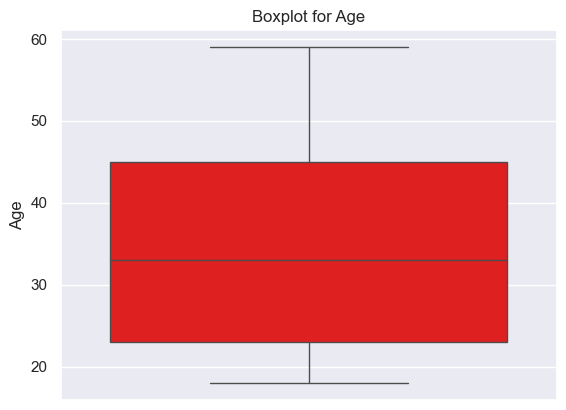

25% Quantile q1 = 23.0
75% Quantile q3 = 45.0
IQR = 22.0

--------------------------------------------------------------------------------
Lower Tail = -10.0
Upper Tail = 78.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0       

In [236]:
Checking_and_Handling_Of_Outliers(df,'Age')

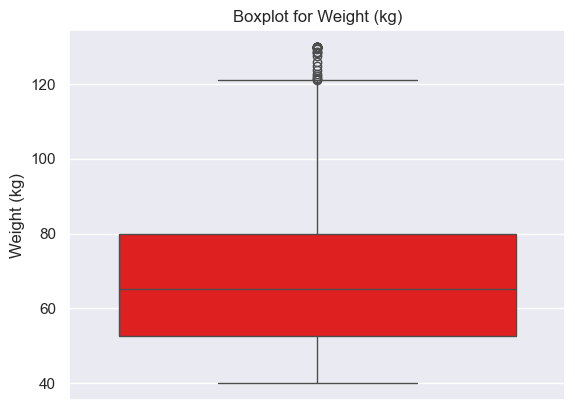

25% Quantile q1 = 52.6
75% Quantile q3 = 80.0
IQR = 27.4

--------------------------------------------------------------------------------
Lower Tail = 11.500000000000007
Upper Tail = 121.1
--------------------------------------------------------------------------------

Outliers :
        Age  Gender  Weight (kg)  Height (m) Max_BPM     Avg_BPM  Resting_BPM  \
20    26.0    Male        129.9    1.710000     196  136.000000         74.0   
23    18.0    Male        129.4    1.500000     177  145.000000         71.0   
129   31.0  Female        129.9    1.700000     190  169.000000         69.0   
266   33.0  Female        129.9    1.690000     168  152.000000         74.0   
279   45.0    Male        129.9    1.750000     197  154.000000         73.0   
305   21.0  Female        121.6    1.780000     182  151.000000         50.0   
343   26.0  Female        122.7    1.739233     191  151.000000         72.0   
378   19.0  Female        129.9    1.710000     161  169.000000         56.0

In [237]:
Checking_and_Handling_Of_Outliers(df,'Weight (kg)')

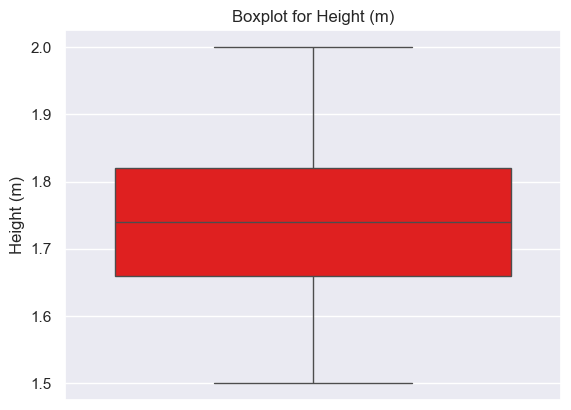

25% Quantile q1 = 1.66
75% Quantile q3 = 1.82
IQR = 0.16000000000000014

--------------------------------------------------------------------------------
Lower Tail = 1.4199999999999997
Upper Tail = 2.0600000000000005
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female       

In [238]:
Checking_and_Handling_Of_Outliers(df,'Height (m)')

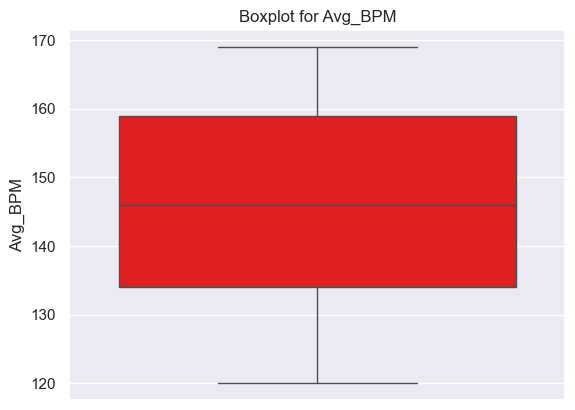

25% Quantile q1 = 134.0
75% Quantile q3 = 159.0
IQR = 25.0

--------------------------------------------------------------------------------
Lower Tail = 96.5
Upper Tail = 196.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0     

In [239]:
Checking_and_Handling_Of_Outliers(df,'Avg_BPM')

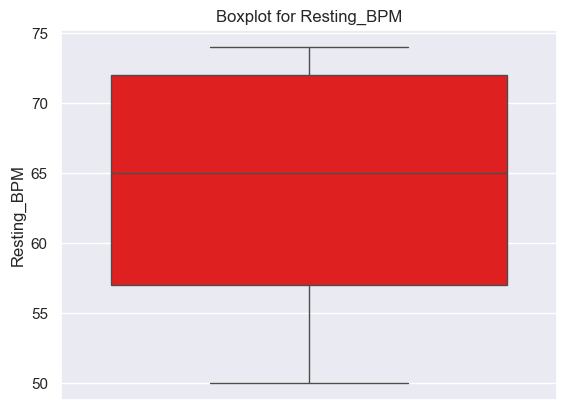

25% Quantile q1 = 57.0
75% Quantile q3 = 72.0
IQR = 15.0

--------------------------------------------------------------------------------
Lower Tail = 34.5
Upper Tail = 94.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0        

In [240]:
Checking_and_Handling_Of_Outliers(df,'Resting_BPM')

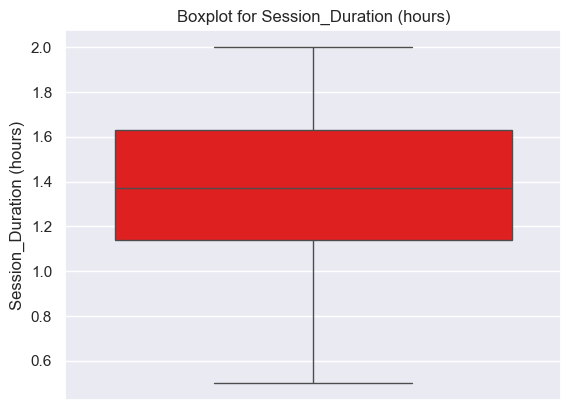

25% Quantile q1 = 1.14
75% Quantile q3 = 1.63
IQR = 0.49

--------------------------------------------------------------------------------
Lower Tail = 0.4049999999999999
Upper Tail = 2.3649999999999998
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1

In [241]:
Checking_and_Handling_Of_Outliers(df,'Session_Duration (hours)')

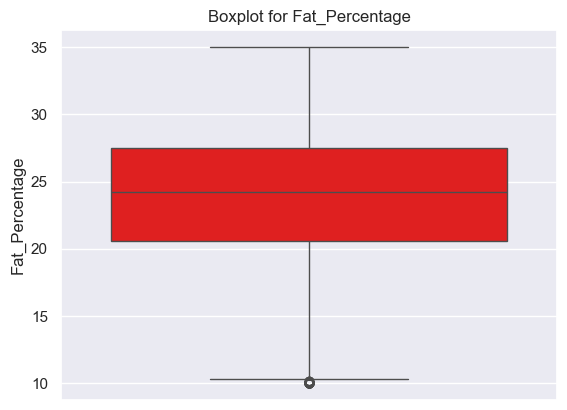

25% Quantile q1 = 20.6
75% Quantile q3 = 27.5
IQR = 6.899999999999999

--------------------------------------------------------------------------------
Lower Tail = 10.250000000000004
Upper Tail = 37.849999999999994
--------------------------------------------------------------------------------

Outliers :
        Age  Gender  Weight (kg)  Height (m) Max_BPM     Avg_BPM  Resting_BPM  \
42    23.0    Male        107.6    1.500000     192  136.000000         71.0   
83    29.0  Female         72.0    1.660000     167  144.000000         68.0   
91    20.0    Male         45.0    1.680000     171  154.000000         74.0   
129   31.0  Female        121.1    1.700000     190  169.000000         69.0   
131   51.0  Female         91.7    1.720000     168  137.000000         58.0   
...    ...     ...          ...         ...     ...         ...          ...   
1686  48.0  Female         57.3    1.900000     172  146.259322         55.0   
1706  21.0  Female         48.7    1.739233     19

In [242]:
Checking_and_Handling_Of_Outliers(df,'Fat_Percentage')

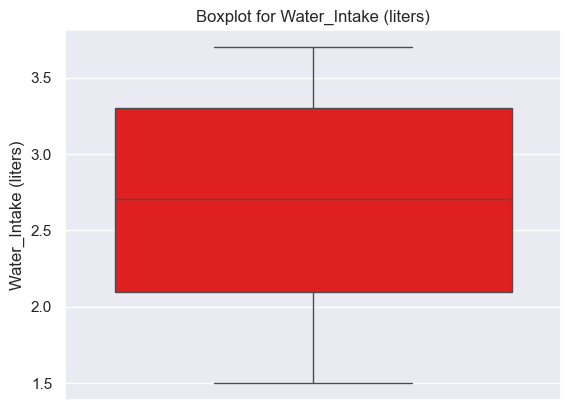

25% Quantile q1 = 2.1
75% Quantile q3 = 3.3
IQR = 1.1999999999999997

--------------------------------------------------------------------------------
Lower Tail = 0.3000000000000005
Upper Tail = 5.1
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82

In [243]:
Checking_and_Handling_Of_Outliers(df,'Water_Intake (liters)')

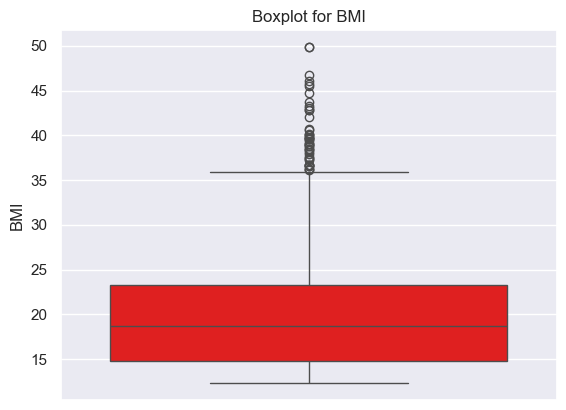

25% Quantile q1 = 14.85
75% Quantile q3 = 23.32
IQR = 8.47

--------------------------------------------------------------------------------
Lower Tail = 2.144999999999998
Upper Tail = 36.025000000000006
--------------------------------------------------------------------------------

Outliers :
        Age  Gender  Weight (kg)  Height (m) Max_BPM     Avg_BPM  Resting_BPM  \
8     18.0  Female         82.9        1.54     174  169.000000         64.0   
54    36.0  Female         40.0        1.71     178  169.000000         69.0   
121   38.0    Male         50.0        1.75     186  135.000000         59.0   
172   18.0    Male         97.5        2.00     169  159.000000         68.0   
201   33.0    Male         42.7        1.82     196  145.000000         68.0   
238   31.0  Female         76.2        1.64     169  137.000000         72.0   
257   51.0    Male         61.1        1.82     165  163.000000         57.0   
279   45.0    Male        121.1        1.75     197  154.00000

In [244]:
Checking_and_Handling_Of_Outliers(df,'BMI')

### analysis of Categorical columns

In [246]:
# create a function for calculate analysis of categorical columns
def analyze_categorical(data, column):
    # Frequency distribution
    f = data[column].value_counts()
    p = data[column].value_counts(normalize=True) * 100

    # Combine frequency and percentage
    analysis = pd.DataFrame({"Frequency": f, "Percentage": p})
    print(f"Analysis of {column}:")
    print(analysis)

    # Bar plot
    f.plot(kind="bar")
    plt.title(f"Frequency Distribution of {column}")
    plt.xlabel(column)
    plt.show()

    # Pie chart
    p.plot(kind="pie", autopct="%.1f%%")
    plt.title(f"Percentage Distribution of {column}")
    plt.show()

Analysis of Gender:
        Frequency  Percentage
Gender                       
Female        929   52.279122
Male          848   47.720878


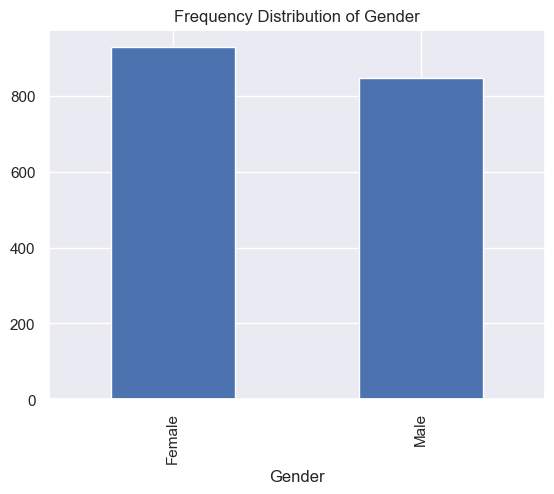

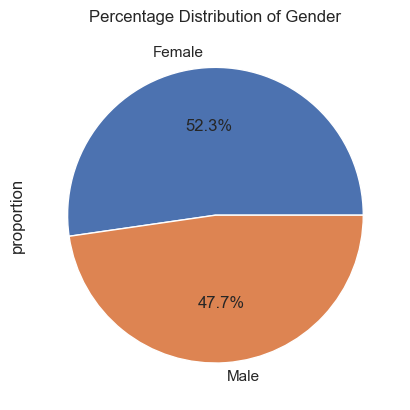

In [247]:
analyze_categorical(df,'Gender')

Analysis of Max_BPM:
         Frequency  Percentage
Max_BPM                       
192             88    4.952167
177             60    3.376477
168             60    3.376477
196             59    3.320203
190             57    3.207653
194             56    3.151379
172             55    3.095104
191             54    3.038829
164             54    3.038829
198             52    2.926280
187             51    2.870006
184             50    2.813731
182             49    2.757456
176             47    2.644907
189             46    2.588633
199             46    2.588633
180             45    2.532358
161             45    2.532358
167             45    2.532358
185             44    2.476083
181             44    2.476083
175             43    2.419809
193             43    2.419809
188             42    2.363534
183             41    2.307259
166             40    2.250985
171             40    2.250985
170             40    2.250985
163             38    2.138436
169             35

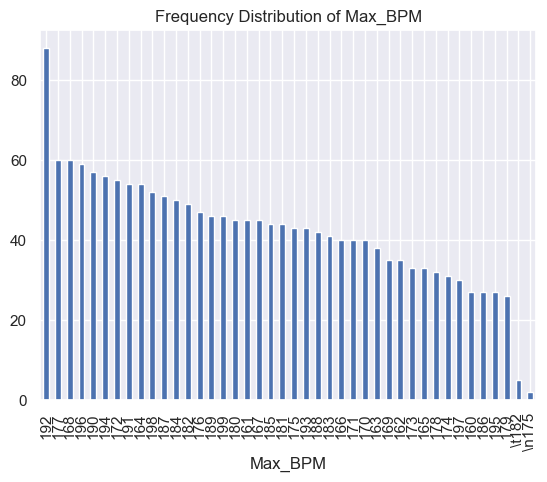

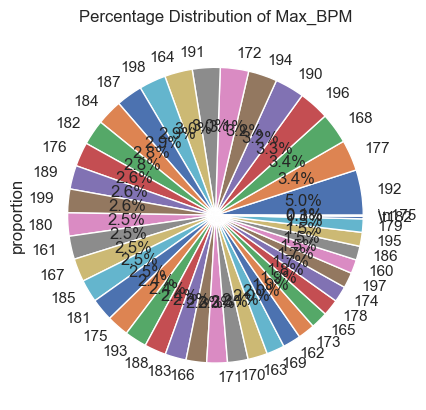

In [248]:
analyze_categorical(df,'Max_BPM')

Analysis of Workout_Type:
              Frequency  Percentage
Workout_Type                       
Strength            514   28.925155
Cardio              426   23.972988
Yoga                419   23.579066
HIIT                385   21.665729
\nStrength           12    0.675295
\tCardio             11    0.619021
\tYoga               10    0.562746


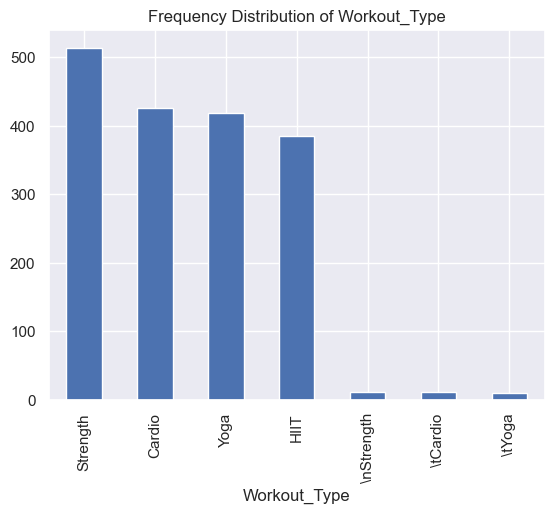

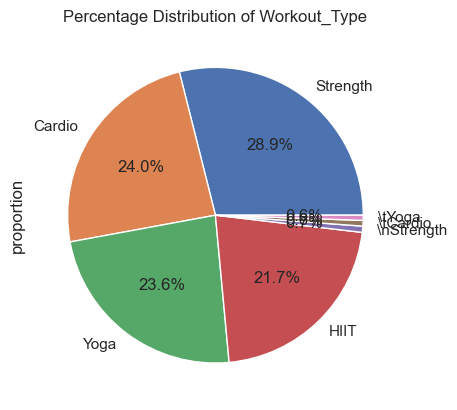

In [249]:
analyze_categorical(df,'Workout_Type')

Analysis of Workout_Frequency (days/week):
                               Frequency  Percentage
Workout_Frequency (days/week)                       
3.000000                             586   32.976927
4.000000                             549   30.894766
2.000000                             378   21.271806
5.000000                             206   11.592572
3.339151                              58    3.263928


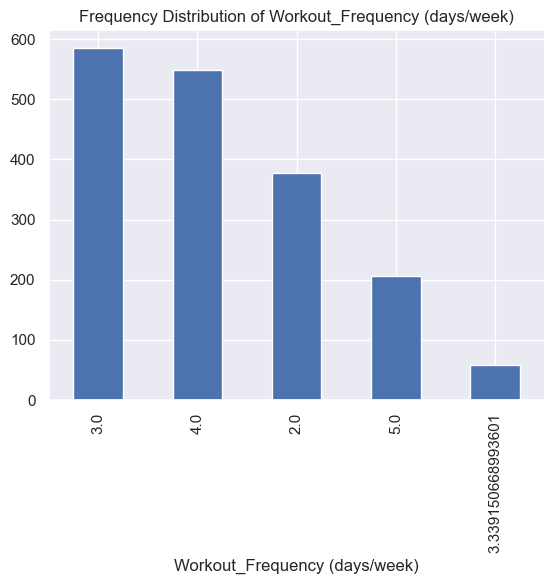

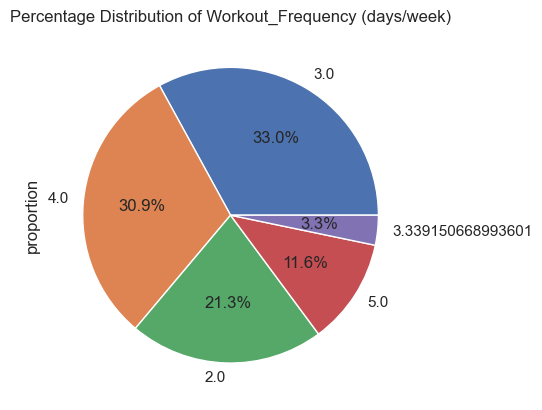

In [250]:
analyze_categorical(df,'Workout_Frequency (days/week)')

Analysis of Experience_Level:
                  Frequency  Percentage
Experience_Level                       
2.000000                711   40.011255
1.000000                658   37.028700
3.000000                351   19.752392
1.821512                 57    3.207653


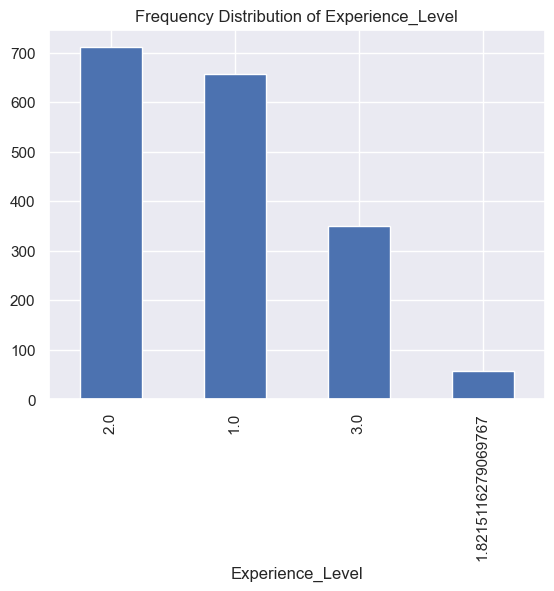

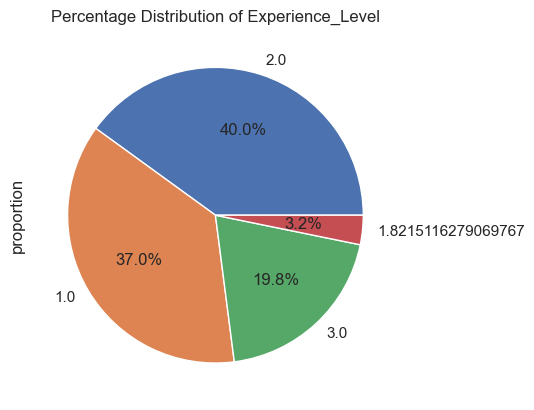

In [251]:
analyze_categorical(df,'Experience_Level')

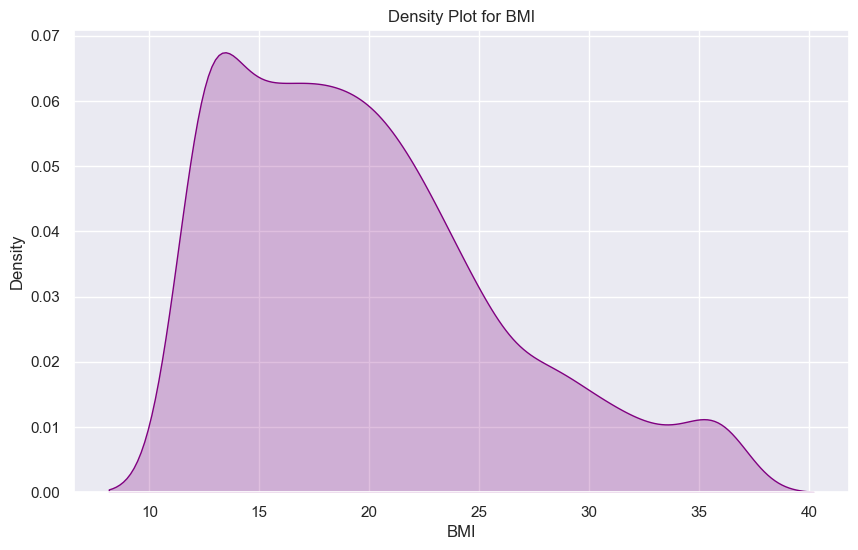

In [252]:
# Density Plot for BMI
plt.figure(figsize=(10, 6))
sns.kdeplot(df["BMI"], shade=True, color="purple")
plt.title("Density Plot for BMI")
plt.xlabel("BMI")
plt.show()

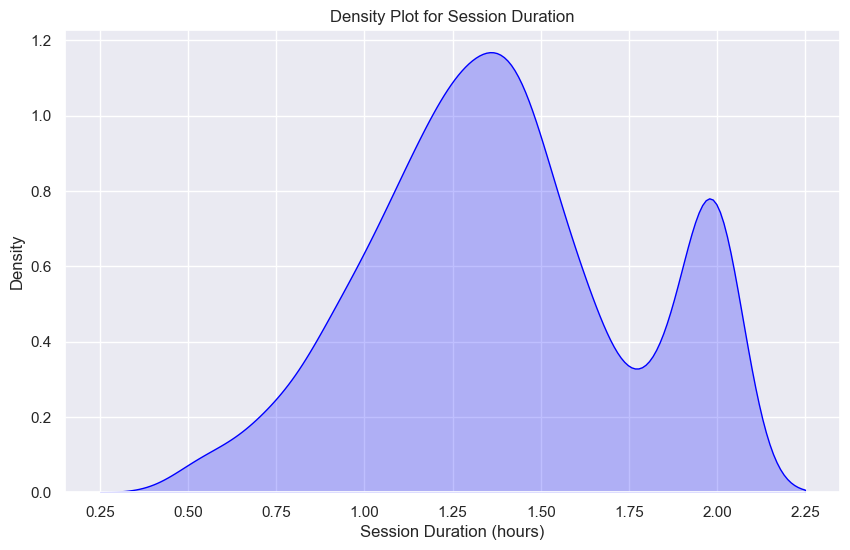

In [253]:
# Density Plot for Session Duration
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Session_Duration (hours)"], shade=True, color="blue")
plt.title("Density Plot for Session Duration")
plt.xlabel("Session Duration (hours)")
plt.show()

## Bivariate Analysis of Columns

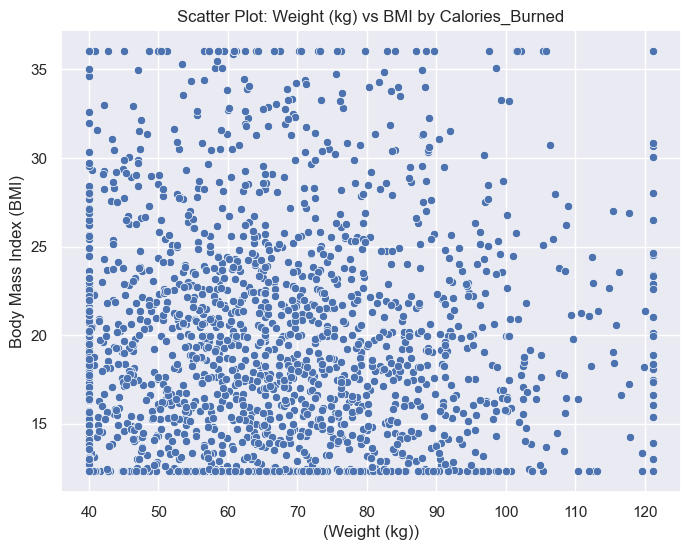

In [255]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight (kg)', y='BMI', palette='Set2')
plt.title('Scatter Plot: Weight (kg) vs BMI by Calories_Burned')
plt.xlabel('(Weight (kg))')
plt.ylabel('Body Mass Index (BMI)')
plt.show()

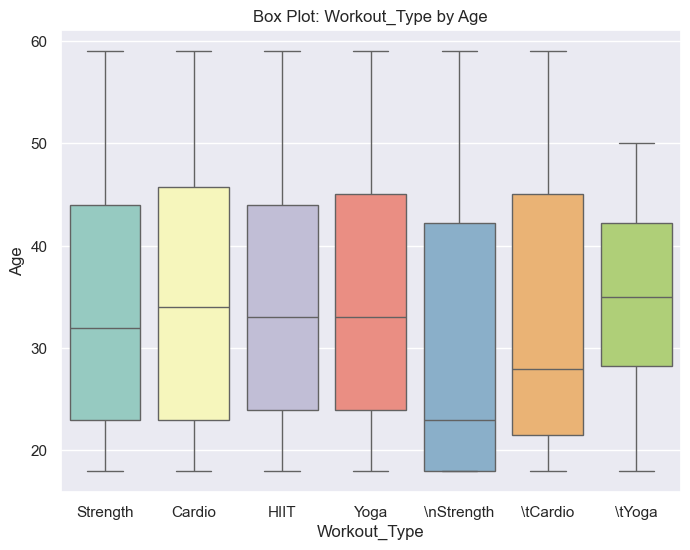

In [256]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Workout_Type', y='Age', palette='Set3')
plt.title('Box Plot: Workout_Type by Age')
plt.xlabel('Workout_Type')
plt.ylabel('Age')
plt.show()

In [257]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                           object
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

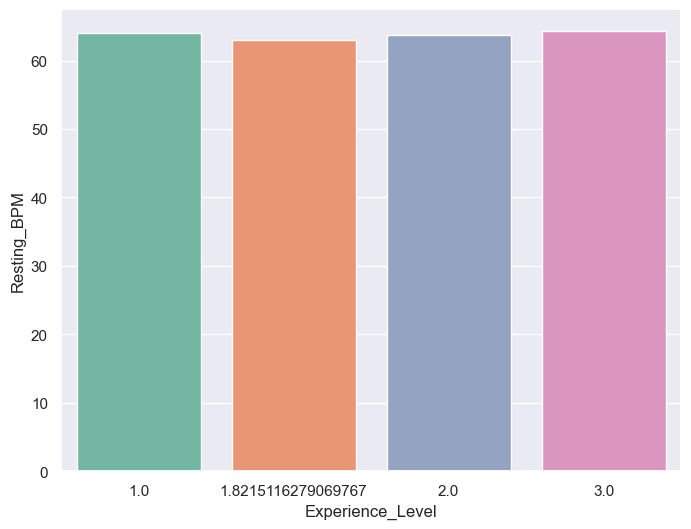

In [258]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Experience_Level', y='Resting_BPM', palette='Set2', ci=None)
plt.xlabel('Experience_Level')
plt.ylabel('Resting_BPM')
plt.show()

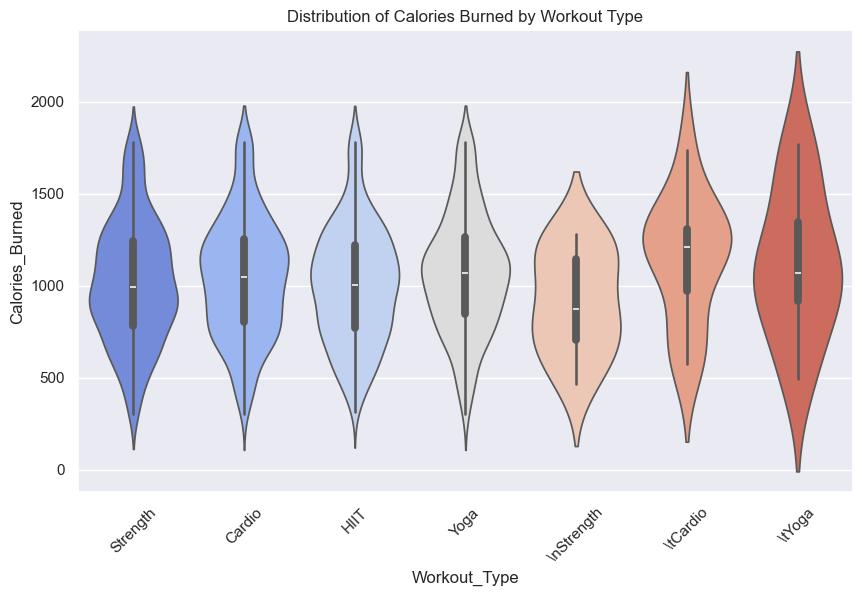

In [259]:
# Set style
sns.set(style="darkgrid")

# Violin Plot: Distribution of Calories Burned by Workout Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Workout_Type", y="Calories_Burned", palette="coolwarm")
plt.title("Distribution of Calories Burned by Workout Type")
plt.xticks(rotation=45)
plt.show()


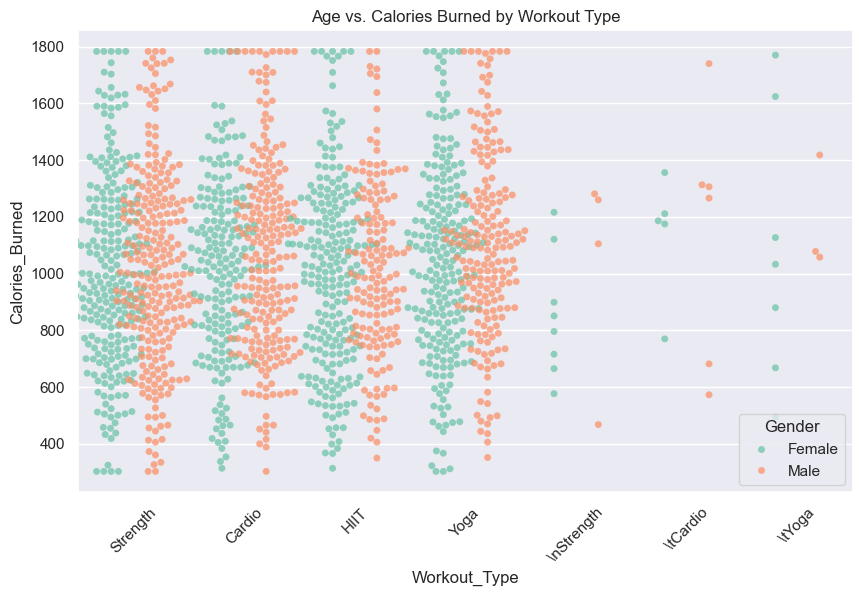

In [260]:
# Swarm Plot: Age vs. Calories Burned
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="Workout_Type", y="Calories_Burned", hue="Gender", dodge=True, palette="Set2", alpha=0.7)
plt.title("Age vs. Calories Burned by Workout Type")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

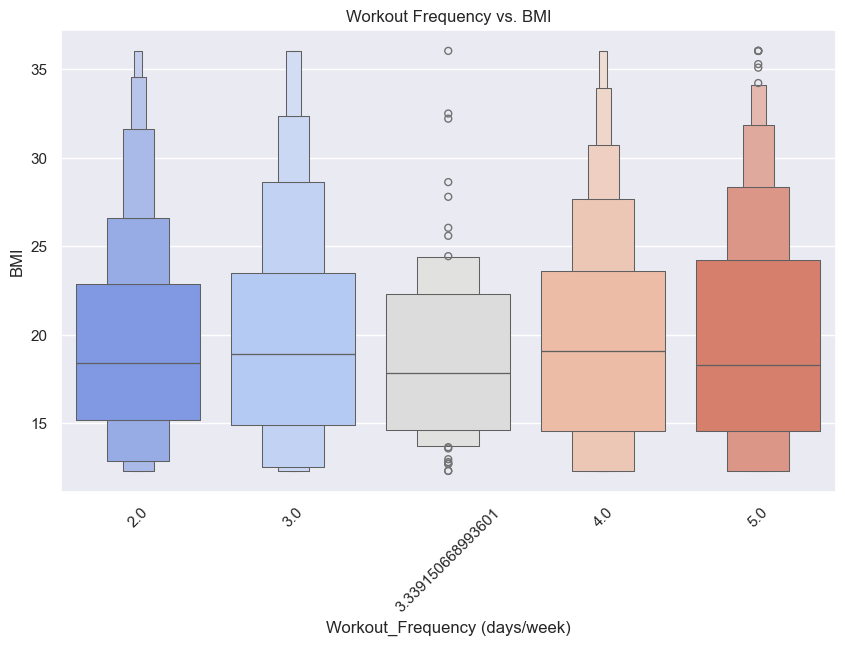

In [261]:
# Boxen Plot: Workout Frequency vs. BMI
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="Workout_Frequency (days/week)", y="BMI", palette="coolwarm")
plt.title("Workout Frequency vs. BMI")
plt.xticks(rotation=45)
plt.show()

In [262]:
df['Gender']=df['Gender'].replace({'Female':1, 'Male':0})

In [263]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,1,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.310
1,26.0,1,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.490
2,22.0,0,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.730
3,54.0,1,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.370
4,34.0,1,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,0,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.025
1796,52.0,0,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.110
1797,47.0,0,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.990
1798,35.0,0,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.650


In [264]:
df['Workout_Type'].unique()


array(['Strength', 'Cardio', 'HIIT', 'Yoga', '\\nStrength', '\\tCardio',
       '\\tYoga'], dtype=object)

In [265]:
df['Workout_Type']=df['Workout_Type'].replace({'Strength':0, 'Cardio':1, 'HIIT':2, 'Yoga':3, '\\nStrength':4, '\\tCardio':5,
       '\\tYoga':6})

In [266]:
# Frequency encoding for 'Route'
Max_BPM_count = df['Max_BPM'].value_counts()
df['Max_BPM'] =df['Max_BPM'].map(Max_BPM_count)

In [267]:
df.dtypes

Age                              float64
Gender                             int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                       int64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

<Axes: >

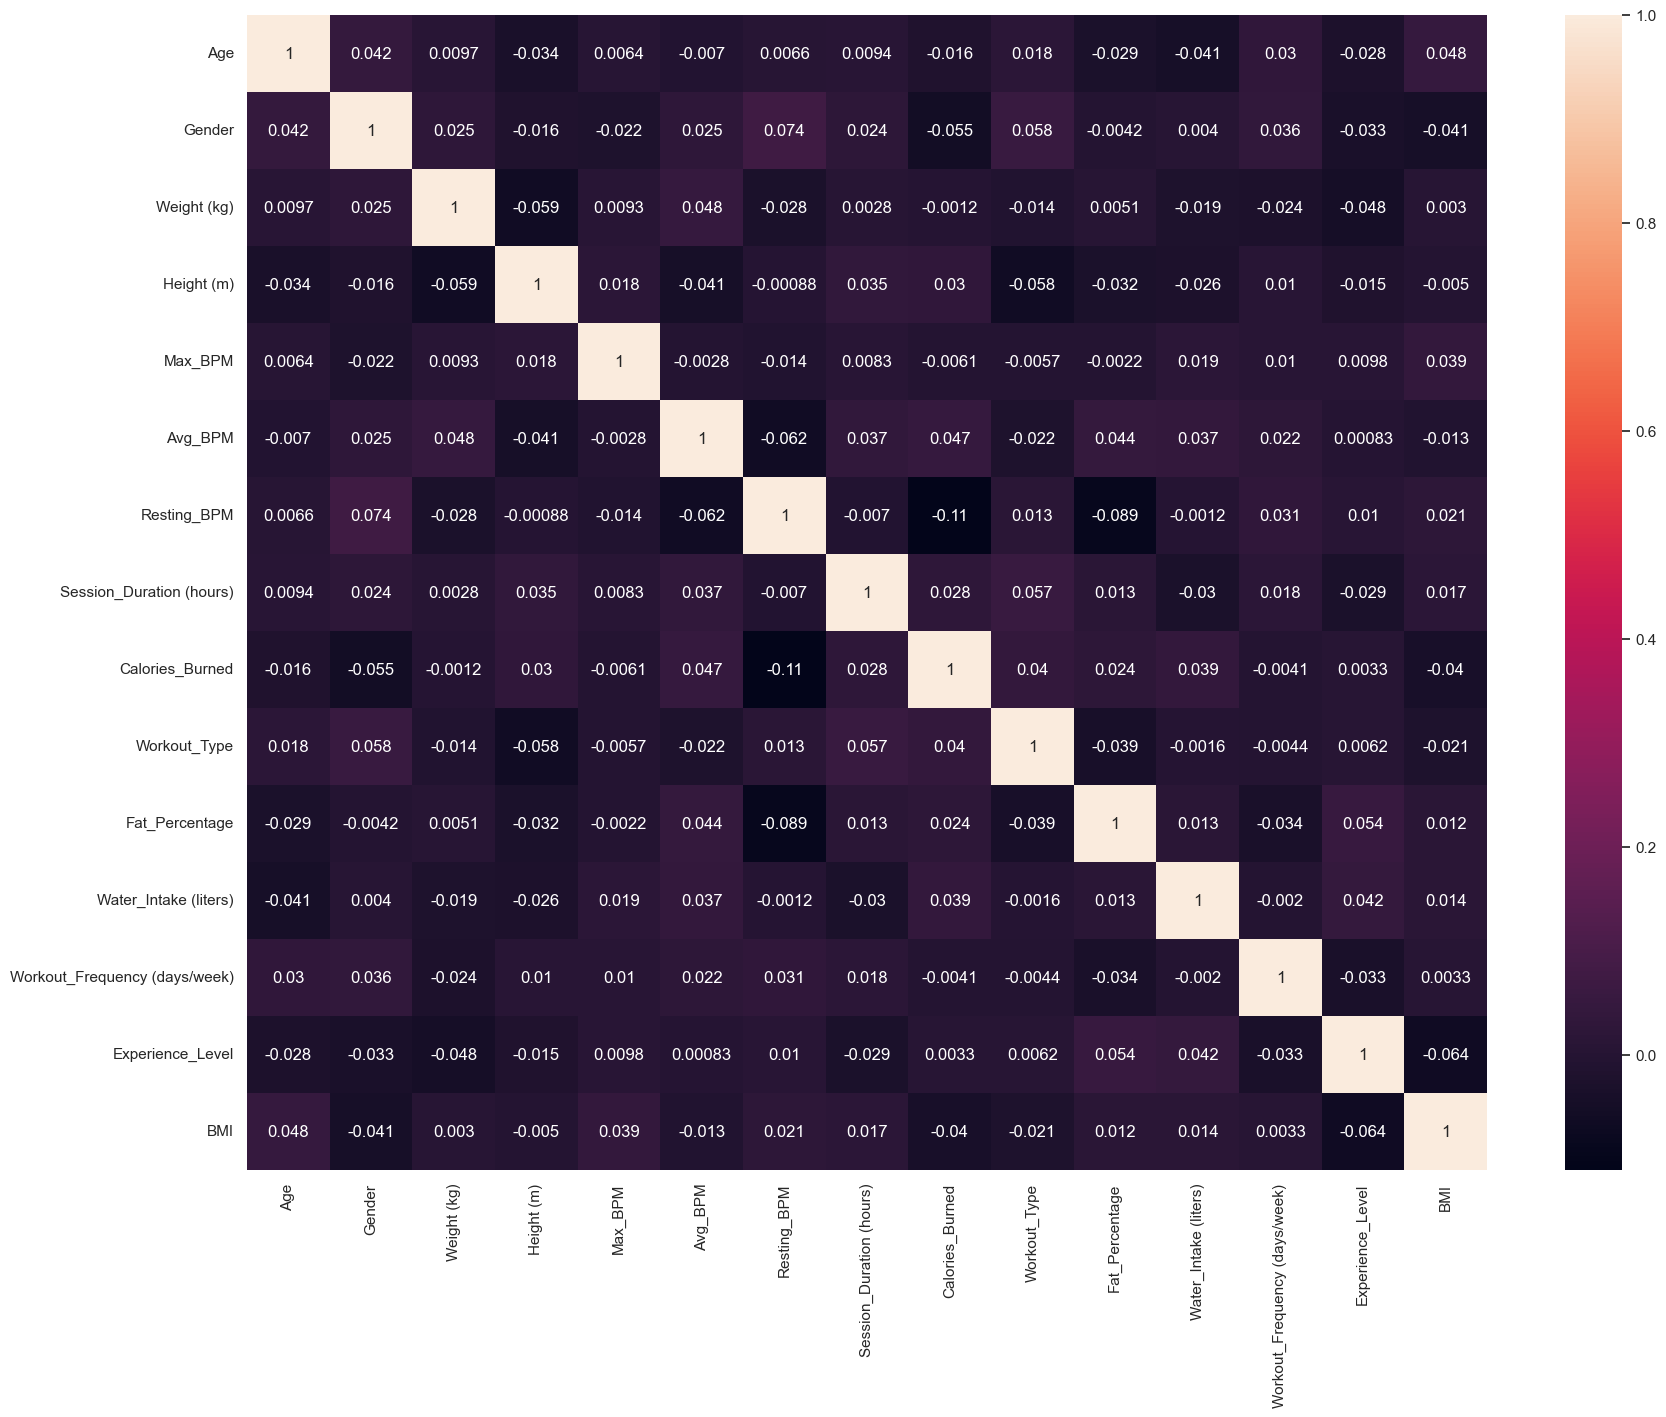

In [268]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

<Figure size 1200x800 with 0 Axes>

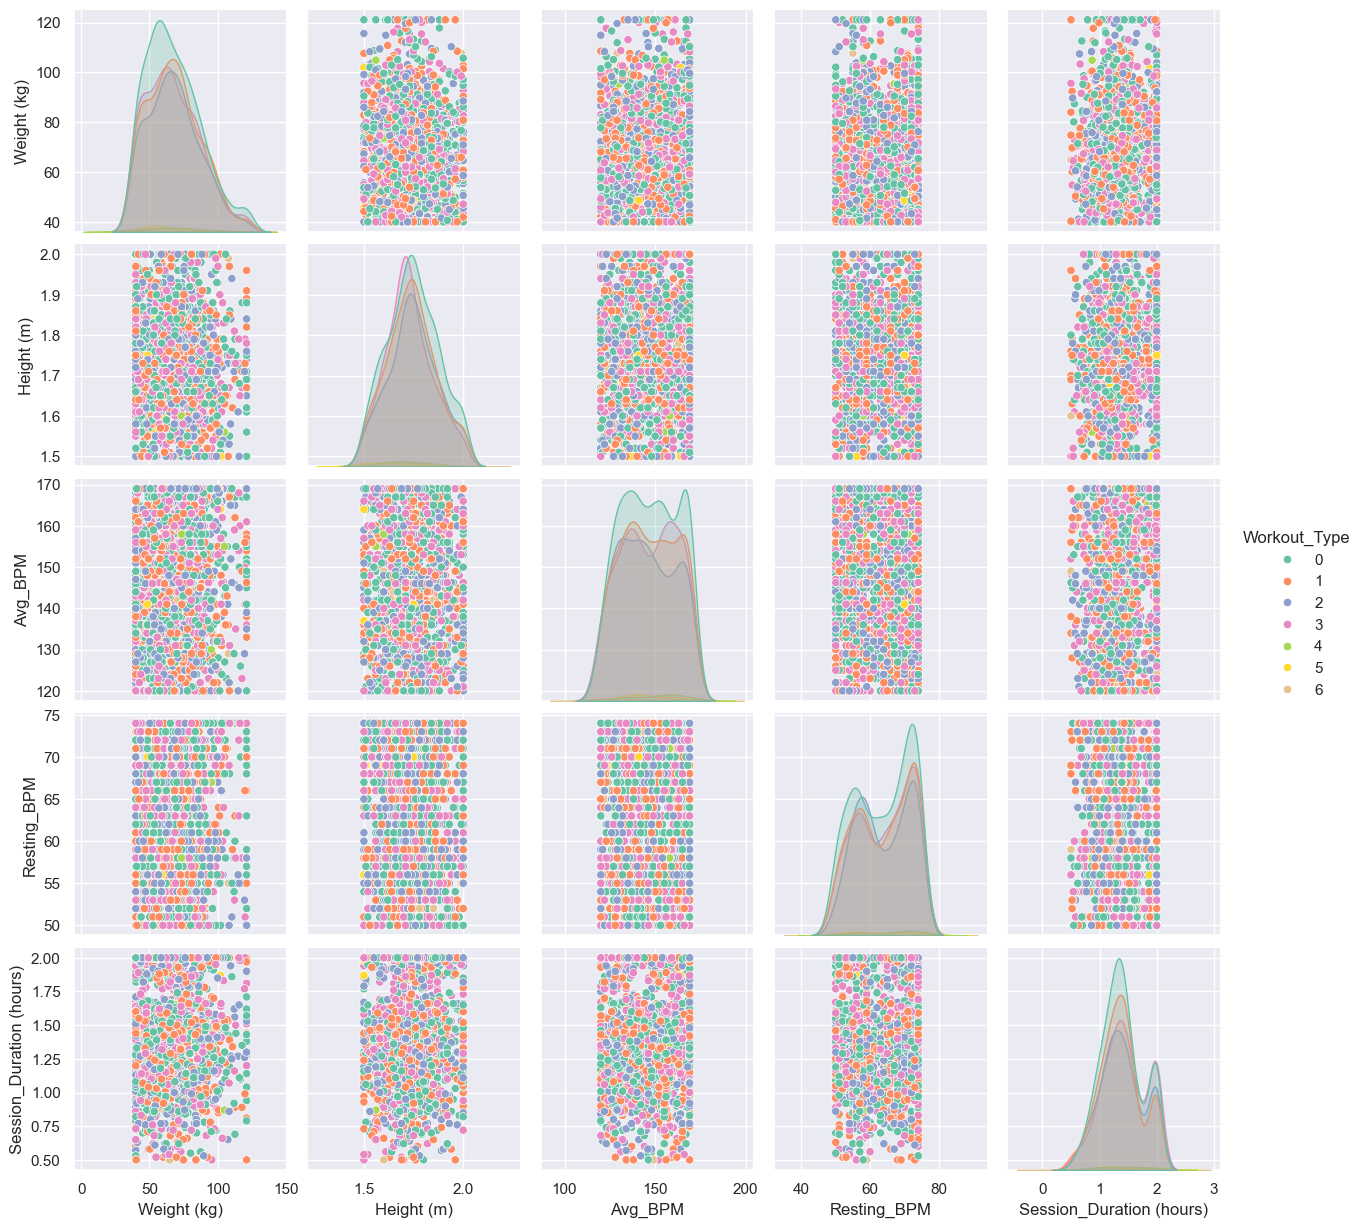

In [269]:
plt.figure(figsize=(12, 8))
sns.pairplot(df,
    vars=['Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)'],
    hue='Workout_Type',
    palette='Set2')

In [270]:
# Train-test split
X = df.drop(columns=['Calories_Burned']) 
y = df['Calories_Burned']

In [271]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42) # Print Shapes of the Splits 

print(f'Shape of X_train: {xtrain.shape}') 
print(f'Shape of X_test: {xtest.shape}') 
print(f'Shape of y_train: {ytrain.shape}') 
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (1421, 14)
Shape of X_test: (356, 14)
Shape of y_train: (1421,)
Shape of y_test: (356,)
